# Remaking FAS plots 2022-06

This script is to recreate Full Archive Search plots from the consolidated FAS_peak_analysis file.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import datetime
import glob
import os
import h5py
import pandas as pd

import sys

sys.path.append( '/home/hubert/DPhil_Studies/2021-04_Study_A_Diffusion/src/d04_modelling' )

from abm import *

remind ourselves of the keys in the file

In [2]:
with h5py.File('/home/hubert/DPhil_Studies/2021-04_Study_A_Diffusion/data/02_intermediate/FAS_peak_analysis.hdf5', 'r') as f:
    print(f.keys())

<KeysViewHDF5 ['peak_detections', 'plot_data', 'segments']>


peak locations are stored as indices, with distance from 2017-10-16

In [3]:
with h5py.File('/home/hubert/DPhil_Studies/2021-04_Study_A_Diffusion/data/02_intermediate/FAS_peak_analysis.hdf5', 'r') as f:
    peak_detections = f['peak_detections']['jotambe']['peak_locations'][:]
    print(peak_detections)
    # plot_data = pd.read_hdf()
    # print(plot_data.keys())

[  2  39 105 141 323 375 621]


plot data is saved through pandas in the 'plot_data' key

In [4]:
plot_data = pd.read_hdf('/home/hubert/DPhil_Studies/2021-04_Study_A_Diffusion/data/02_intermediate/FAS_peak_analysis.hdf5', 'plot_data')

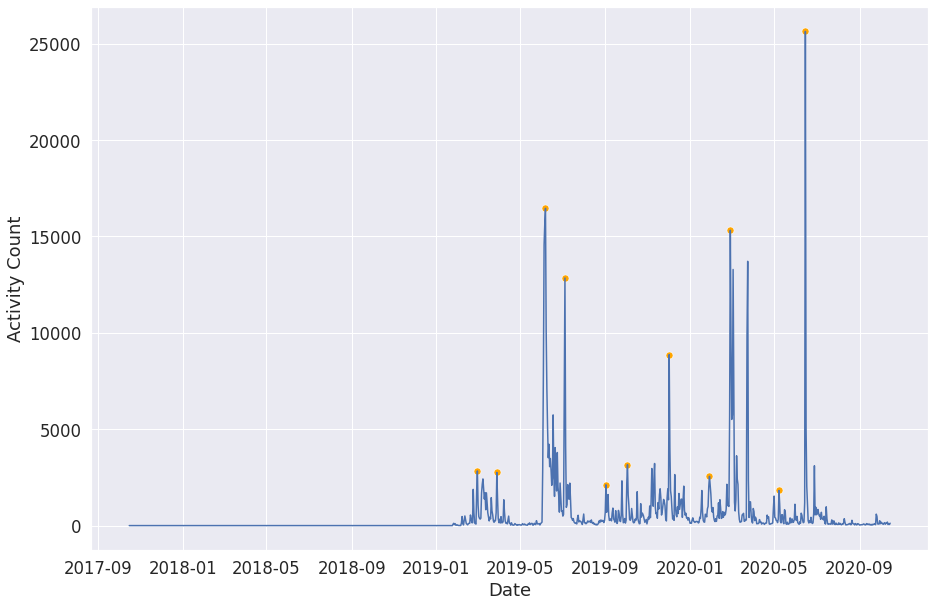

In [5]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.set(font_scale=1.5)
ht = 'kutoo'
temp_plot_data = plot_data[plot_data['hashtag']==ht]
with h5py.File('/home/hubert/DPhil_Studies/2021-04_Study_A_Diffusion/data/02_intermediate/FAS_peak_analysis.hdf5', 'r') as f:
    peak_detections = f['peak_detections'][ht]['peak_locations'][:]
temp_peak_data = pd.DataFrame({'created_at':[unit_conv(i) for i in peak_detections]}).merge(temp_plot_data, on='created_at', how='left')
temp_peak_data['hashtag'] = 'peak'
# temp_plot_data = pd.concat((temp_plot_data,temp_peak_data))
ax = sns.lineplot(data = temp_plot_data,
                x='created_at',
                y='vocab:#')
sns.scatterplot(data = temp_peak_data,
                x='created_at',
                y='vocab:#', color='orange', s=50)

ax.set(xlabel='Date',
    ylabel='Activity Count')

plt.savefig(f'../results/{ht}.png', dpi=300, transparent=True, bbox_inches='tight')

In [6]:
totals = plot_data.groupby('hashtag').sum()
totals = totals.sort_values('vocab:#', ascending=False)
totals

,vocab:#
hashtag,
metoo,12608231
niunamenos,2156612
timesup,1582632
kutoo,567669
cuentalo,483574
withyou,455178
balancetonporc,284934
noustoutes,240006
wetoo,97957


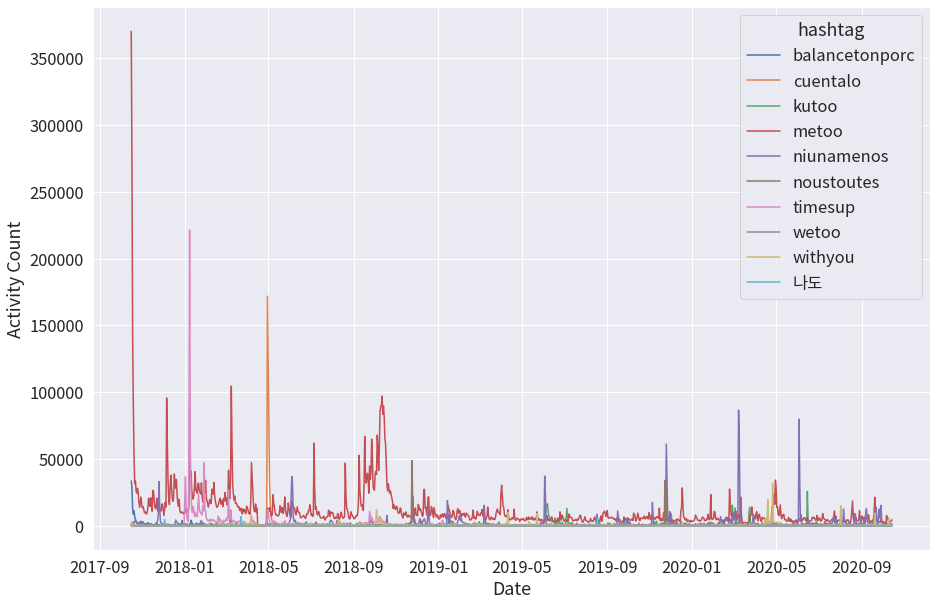

In [7]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.set(font_scale=1.5)
import matplotlib
# Customize matplotlib
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': ['Noto Sans JP','Noto Sans TC', 'Noto Sans KR', 'Open Sans', 'Cairo'],
    }
)

# temp_plot_data = plot_data[plot_data['hashtag']==ht]
# temp_plot_data = pd.concat((temp_plot_data,temp_peak_data))
totals = plot_data.groupby('hashtag').sum()
totals = totals.sort_values('vocab:#', ascending=False)
to_plot=totals.iloc[:10,:].reset_index(0)

ax = sns.lineplot(data = plot_data[plot_data['hashtag'].isin(to_plot['hashtag'])],
                x='created_at',
                hue='hashtag',
                y='vocab:#');

ax.set(xlabel='Date',
    ylabel='Activity Count');

plt.savefig(f'../results/new_FAS_activity.png', dpi=300, transparent=True, bbox_inches='tight');

In [9]:
def unit_conv(val):
    return datetime.datetime.strptime('2017-10-16', '%Y-%m-%d') + datetime.timedelta(days=int(val))


In [13]:
with open('/home/hubert/DPhil_Studies/2021-04_Study_A_Diffusion/data/archive/FAS_ranges.obj', 'rb') as f:
    ranges = pickle.load(f)

with open('/home/hubert/DPhil_Studies/2021-04_Study_A_Diffusion/data/archive/FAS_prominences.obj', 'rb') as f:
    wnp = pickle.load(f)

[459.18518518518516,
 2637.779487179487,
 48.57142857142857,
 271.76,
 1692.6190476190477,
 293.9761904761905,
 295.73809523809524,
 2425.0714285714284,
 793.5952380952381,
 670.0714285714286]

In [17]:
plot_data['vocab:#'].max()

370096

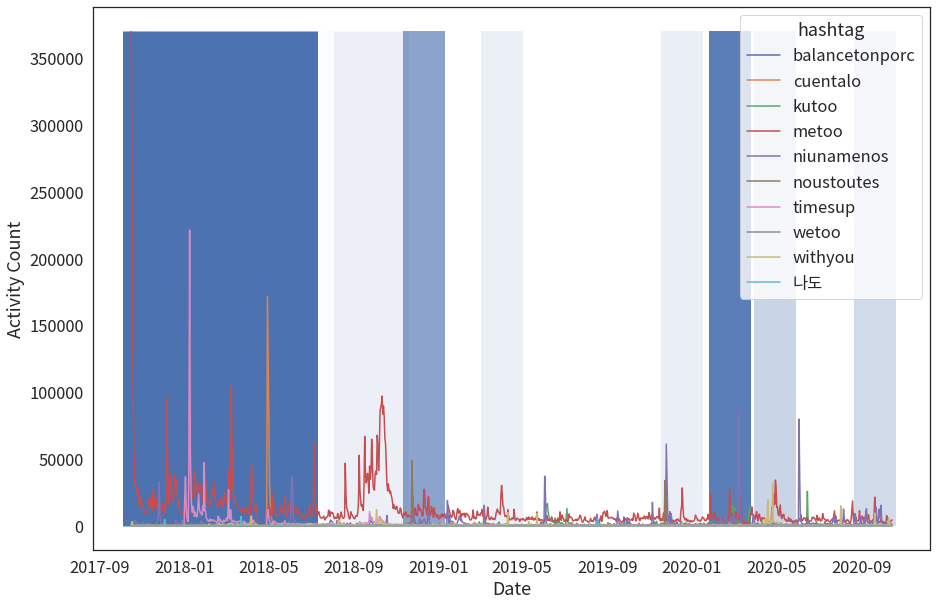

In [21]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.set(font_scale=1.5)
sns.set_style('white')
import matplotlib
# Customize matplotlib
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': ['Noto Sans JP','Noto Sans TC', 'Noto Sans KR', 'Open Sans', 'Cairo'],
        'font.size':20
    }
)

# temp_plot_data = plot_data[plot_data['hashtag']==ht]
# temp_plot_data = pd.concat((temp_plot_data,temp_peak_data))
totals = plot_data.groupby('hashtag').sum()
totals = totals.sort_values('vocab:#', ascending=False)
to_plot=totals.iloc[:10,:].reset_index(0)

ax = sns.lineplot(data = plot_data[plot_data['hashtag'].isin(to_plot['hashtag'])],
                x='created_at',
                hue='hashtag',
                y='vocab:#');

ax.set(xlabel='Date',
    ylabel='Activity Count');

plt.vlines([i[0]+0.5*(i[1]-i[0]) for i in ranges],
        ymin = 0,
        ymax = plot_data['vocab:#'].max(),
        linewidth = [(i[1]-i[0]).days for i in ranges],
        # linewidth = 5,
        alpha = wnp/max(wnp)
        );

